In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from mlfinlab import structural_breaks as sb

In [3]:
import yfinance as yf
close = yf.download('SPY','2017-1-1').Close

[*********************100%***********************]  1 of 1 completed


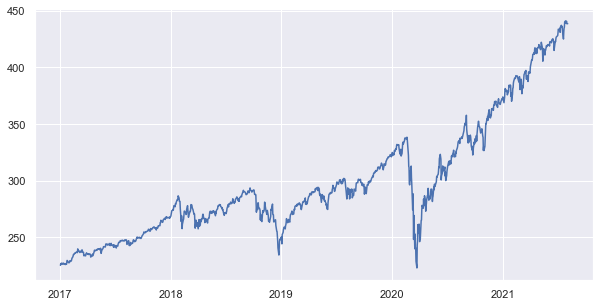

In [4]:
plt.figure(figsize=(10,5))
plt.plot(close)
plt.show()

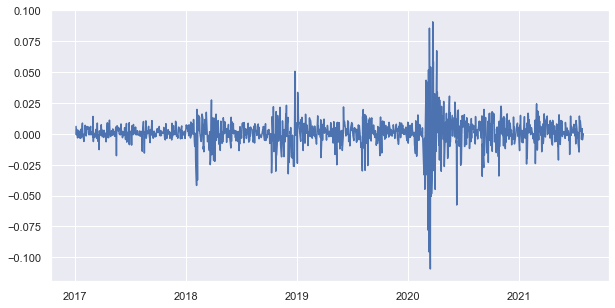

In [5]:
plt.figure(figsize=(10,5))
plt.plot(close.pct_change())
plt.show()

In [6]:
CDF = sb.chow.get_chow_type_stat(close, min_length = 20, num_threads=2)

2021-08-03 01:21:20.593743 100.0% _get_dfc_for_t done after 0.06 minutes. Remaining 0.0 minutes.


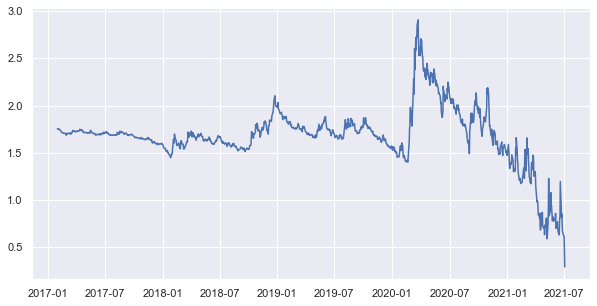

In [7]:
plt.figure(figsize=(10,5))
plt.plot(CDF)
plt.show()

In [8]:
CSWS1 = sb.get_chu_stinchcombe_white_statistics(close, test_type='one_sided',num_threads=2)

2021-08-03 01:21:50.468175 100.0% _get_s_n_for_t done after 0.49 minutes. Remaining 0.0 minutes.


In [9]:
CSWS1

,stat,critical_value
Date,,
2017-01-05,0.448708,2.300684
2017-01-06,0.915724,2.387177
2017-01-09,0.600667,2.44669
2017-01-10,0.716338,2.491874
2017-01-11,1.098517,2.528193
...,...,...
2021-07-27,0.947102,3.228932
2021-07-28,0.945742,3.229388
2021-07-29,0.952923,3.229842


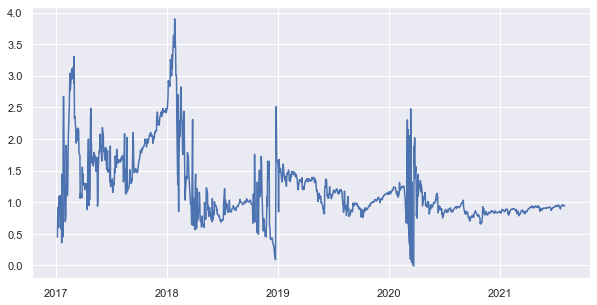

In [10]:
plt.figure(figsize=(10,5))
plt.plot(CSWS1.stat)
plt.show()

In [11]:
CSWS2 = sb.get_chu_stinchcombe_white_statistics(close, test_type='two_sided',num_threads=4)

2021-08-03 01:22:11.089109 100.0% _get_s_n_for_t done after 0.34 minutes. Remaining 0.0 minutes.


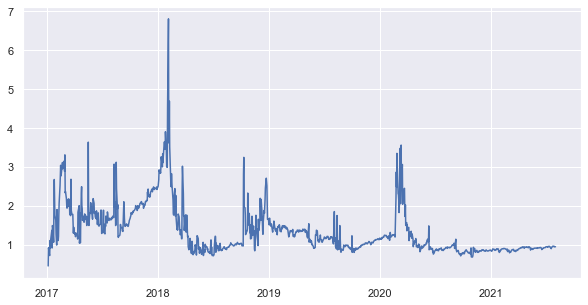

In [12]:
plt.figure(figsize=(10,5))
plt.plot(CSWS2.stat)
plt.show()

In [13]:
df_ = pd.concat([pd.to_numeric(CSWS1.stat.rename('one_sided')), pd.to_numeric(CSWS2.stat.rename('two_sided'))], axis=1)

In [14]:
df_.corr()

,one_sided,two_sided
one_sided,1.00000,0.70005
two_sided,0.70005,1.00000


In [15]:
models = ['linear', 'quadratic', 'sm_poly_1', 'sm_poly_2', 'sm_exp', 'sm_power']
phis = [0, 0.5, 1]

In [16]:
import numpy as np

In [38]:
SADF = sb.get_sadf(np.log(close), model=models[0],lags=10, min_length=20,phi=0,num_threads=4)

2021-08-03 01:33:31.033961 100.0% _sadf_outer_loop done after 0.63 minutes. Remaining 0.0 minutes.


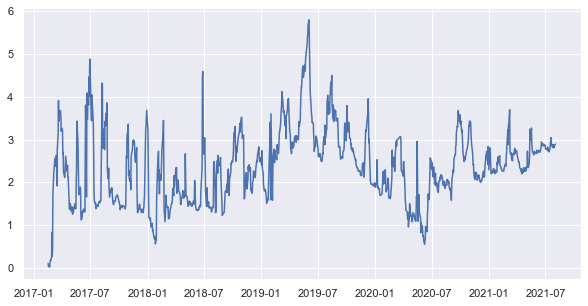

In [39]:
plt.figure(figsize=(10,5))
plt.plot(SADF)
plt.show()

In [19]:
QADF = sb.get_sadf(np.log(close), model=models[1],lags=5, min_length=20,phi=0,num_threads=4)

2021-08-03 01:25:02.945061 100.0% _sadf_outer_loop done after 0.47 minutes. Remaining 0.0 minutes.


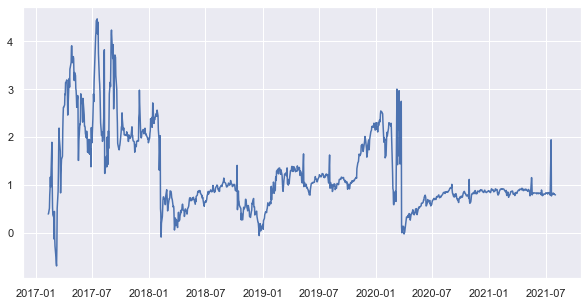

In [20]:
plt.figure(figsize=(10,5))
plt.plot(QADF)
plt.show()

In [22]:
SMT_poly1 = sb.get_sadf(np.log(close), model=models[2],lags=5, min_length=20,phi=0.5,num_threads=4)

2021-08-03 01:26:00.854189 100.0% _sadf_outer_loop done after 0.34 minutes. Remaining 0.0 minutes.


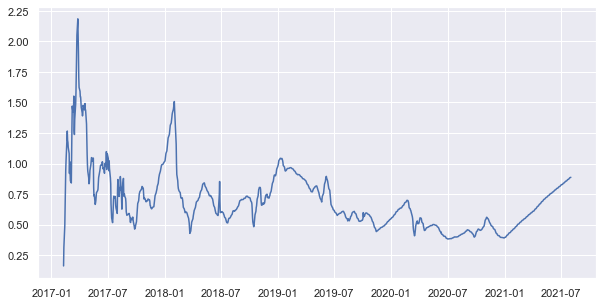

In [23]:
plt.figure(figsize=(10,5))
plt.plot(SMT_poly1)
plt.show()

In [27]:
SMT_poly2 = sb.get_sadf(np.log(close), model=models[3],lags=5, min_length=20,phi=0.5,num_threads=4)

2021-08-03 01:27:39.722723 100.0% _sadf_outer_loop done after 0.34 minutes. Remaining 0.0 minutes.
2021-08-03 01:28:00.746949 100.0% _sadf_outer_loop done after 0.34 minutes. Remaining 0.0 minutes.


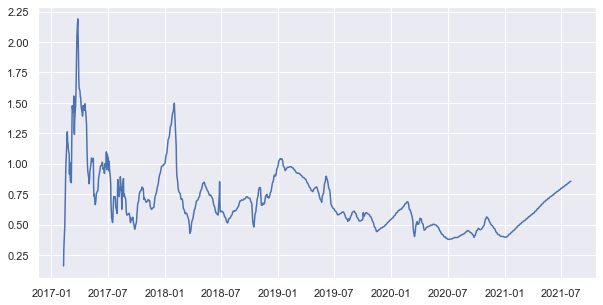

In [28]:
plt.figure(figsize=(10,5))
plt.plot(SMT_poly2)
plt.show()

In [30]:
SMT_exp = sb.get_sadf(np.log(close), model=models[4],lags=5, min_length=20,phi=0.5, num_threads=4)

2021-08-03 01:28:46.472701 100.0% _sadf_outer_loop done after 0.31 minutes. Remaining 0.0 minutes.


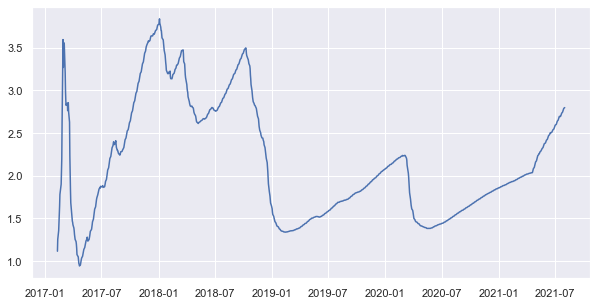

In [31]:
plt.figure(figsize=(10,5))
plt.plot(SMT_exp)
plt.show()

In [32]:
SMT_power = sb.get_sadf(np.log(close), model=models[5],lags=5, min_length=20,phi=0.5, num_threads=4)

2021-08-03 01:29:18.328515 100.0% _sadf_outer_loop done after 0.33 minutes. Remaining 0.0 minutes.


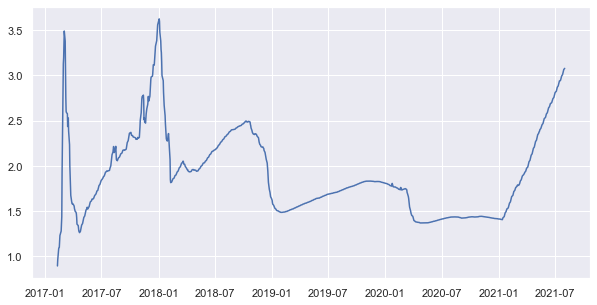

In [33]:
plt.figure(figsize=(10,5))
plt.plot(SMT_power)
plt.show()